In [3]:

import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures





In [2]:
reg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]


In [3]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print(diabetes_X_train.shape)
print(diabetes_X_test.shape)

print(diabetes_y_train.shape)
print(diabetes_y_test.shape)

(422, 1)
(20, 1)
(422,)
(20,)


In [4]:
#fit model 
reg.fit(diabetes_X_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# Make predictions using the testing set
diabetes_y_pred = reg.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47
(20, 1)
(20,)


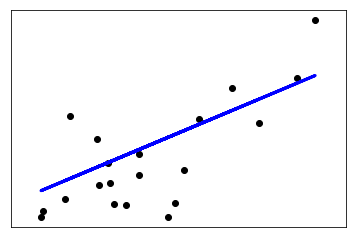

In [6]:

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
print(diabetes_X_test.shape)
print(diabetes_y_test.shape)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Fit a line

In [39]:
def poly(x):
    return (np.cos(.5*x) +.2*x)

def noise(y):
    r = np.random.normal(0,.5,size=y.shape[0])
    return(y + r)

Mean squared error: 0.71
Variance score: 0.67


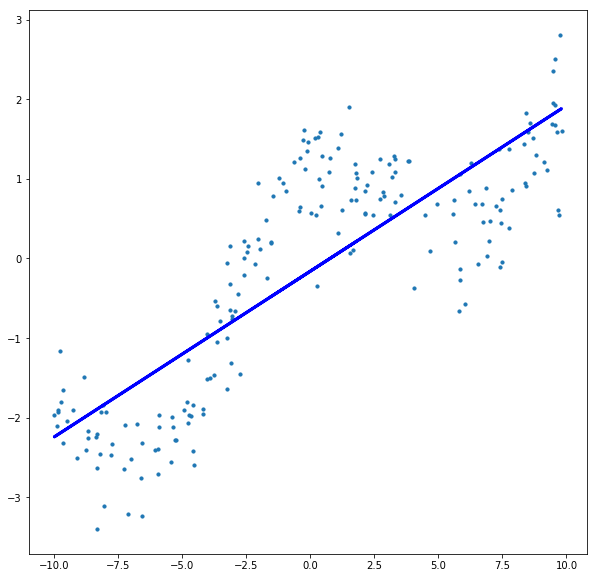

In [40]:
x = np.random.uniform(low=-10, high=10, size=200).reshape((200, 1))
y = noise(poly(x.flatten()))

reg = linear_model.LinearRegression()
#fit model 
reg.fit(x,y)
# Make predictions using the testing set
y_pred = reg.predict(x)
# The coefficients
# print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(x, y,  s=10)
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

# Fit a Polynomial 

(20,)
(20,)
Mean squared error: 0.46
Variance score: 0.86


/home/lino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


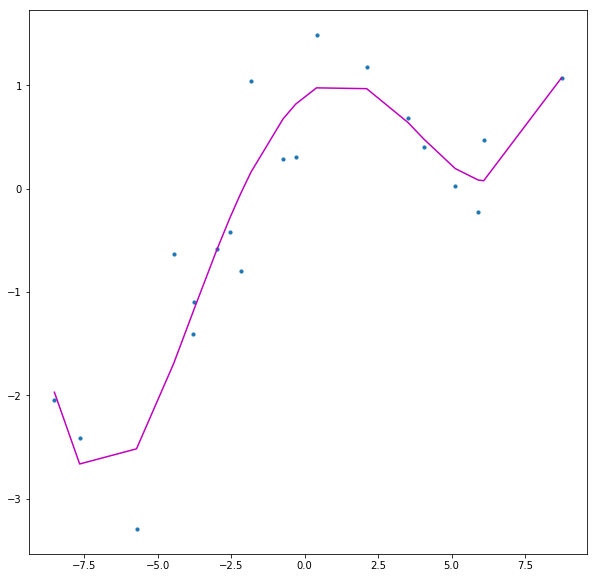

In [48]:
x = np.random.uniform(low=-10, high=10, size=20).reshape((20, 1))

print(x.flatten().shape)
y = noise(poly(x.flatten()))

print(y.shape)

polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)

reg = linear_model.Lasso(alpha=np.exp(-18))
reg.fit(x_poly, y)
y_poly_pred = reg.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print("Mean squared error: %.2f"
      % rmse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2)

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)


plt.plot(x, y_poly_pred, color='m')
plt.show()

# Classification 

In [4]:
def create_class(x,y,n):
    a = np.random.normal(x,2,n).reshape(n,1)
#     print(a)
    b = np.random.normal(y,2,n).reshape(n,1)
#     print(b)
    return np.hstack((a,b))

def error(y_pred, Y):
    return np.sum(y_pred - Y)

error 0.0


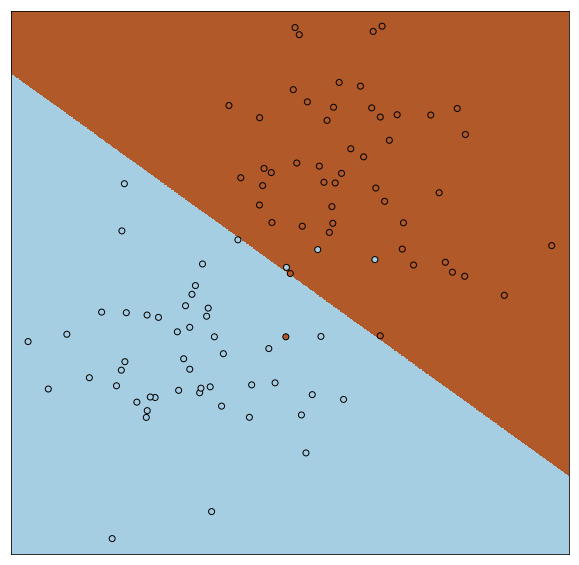

In [5]:
n = 50
#train X
x1_train = create_class(10,12,n)
x2_train = create_class(5,7,n)
x_train = np.vstack((x1_train,x2_train))
# y train
y1 = np.ones(n)
y2 = np.ones(n)*-1
y_train = (np.hstack((y1,y2)))


n = 10
# Test X
x1_test = create_class(10,12,n)
x2_test = create_class(5,7,n)
x_test = np.vstack((x1_test,x2_test))
x1_test = create_class(10,12,n)
x2_test = create_class(5,7,n)
# y test
y1 = np.ones(n)
y2 = np.ones(n)*-1
y_test = np.hstack((y1,y2))



logreg = linear_model.LogisticRegression(C=.00001, solver='newton-cg', penalty = "l2")

logreg.fit(x_train,y_train)

ws = logreg.coef_.flatten()

w0 = logreg.intercept_

Z = logreg .predict(x_test)  

print("error " + str(error(Z,y_test)))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(10,10))
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


# SVM Classifier

In [20]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear', C=100000)  
print(x_train[0])
x_train[0] = [-1000,-1000]
clf.fit(x_train, y_train, )  

[-1000. -1000.]


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
Z = clf.predict(x_test)  

print("error " + str(error(Z,y_test)))

error 0.0


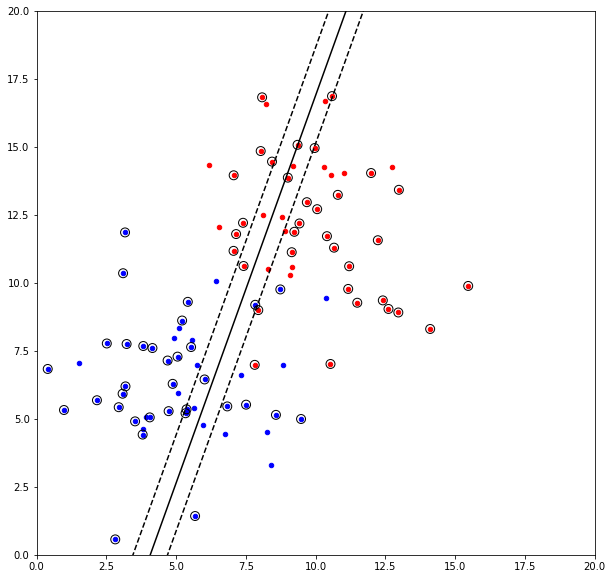

In [21]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 15)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(x_train[0:50][:,0],x_train[0:50][:,1], s=20, c ="r")
plt.scatter(x_train[50:100][:,0],x_train[50:100][:,1], s=20, c ="b")


plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

plt.axis([0,20,0,20])

plt.show()

# PCA

(150, 4)
(150, 3)


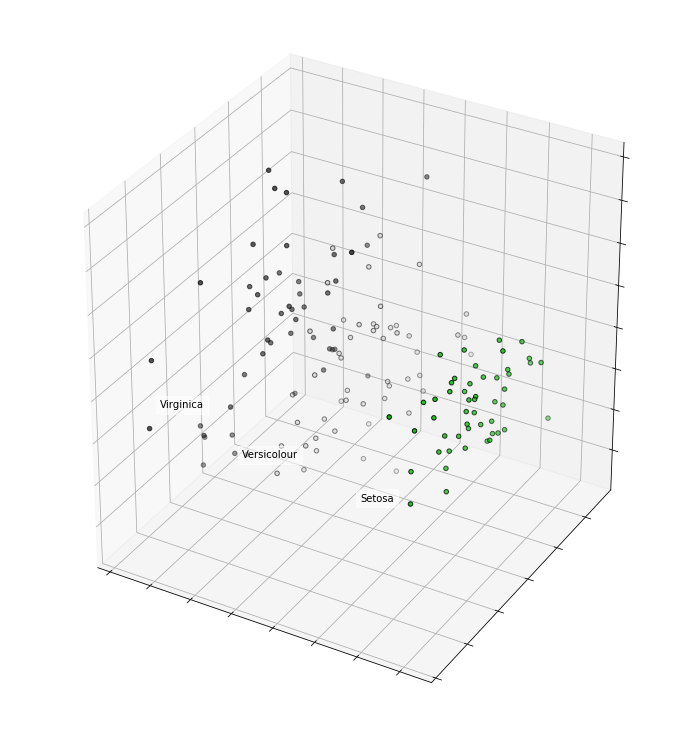

In [348]:
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
Xorig = iris.data
print(Xorig.shape)
y = iris.target

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(Xorig)
X = pca.transform(Xorig)
print(X.shape)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

(150, 2)


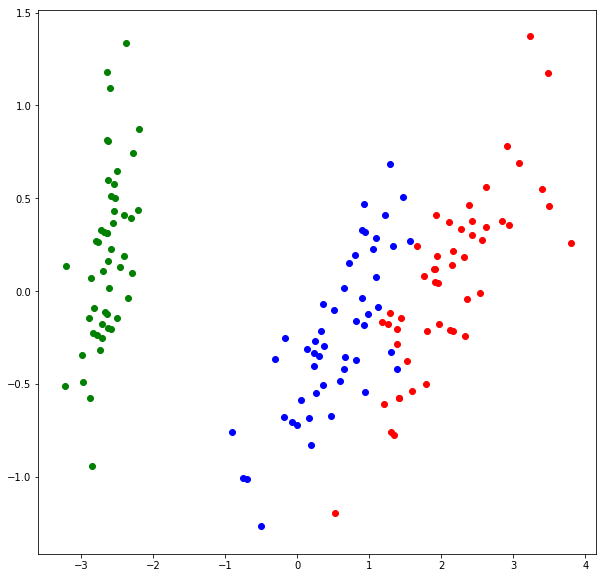

In [343]:
pca = decomposition.PCA(n_components=2)
pca.fit(Xorig)
X = pca.transform(Xorig)
print(X.shape)

plt.figure(figsize=(10,10))
plt.scatter(X[y == 0][:,0],X[y == 0][:,1] ,  c='r')
plt.scatter(X[y == 1][:,0],X[y == 1][:,1] , c='g')
plt.scatter(X[y == 2][:,0],X[y == 2][:,1] ,  c='b')
plt.show()

(150, 1)


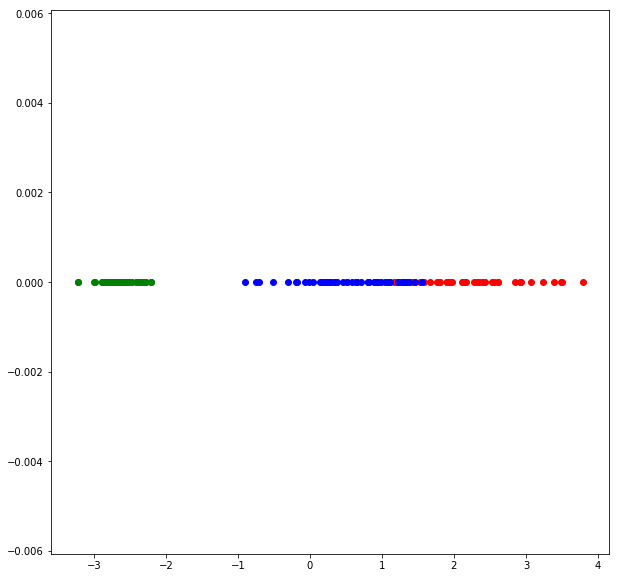

In [344]:
pca = decomposition.PCA(n_components=1)
pca.fit(Xorig)
X = pca.transform(Xorig)
print(X.shape)
plt.figure(figsize=(10,10))
plt.scatter(X[y == 0][:,0],np.zeros(50) ,  c='r')
plt.scatter(X[y == 1][:,0],np.zeros(50) , c='g')
plt.scatter(X[y == 2][:,0],np.zeros(50)  ,  c='b')
plt.show()